In [1]:
import numpy as np
import cv2
import functions as fc
import LeNet_module as mc
import importlib
import pandas as pd
import random
import pickle
import time
import matplotlib.pyplot as plt

# Load image path

In [2]:
train_df = pd.read_csv('./images/train.txt', sep=' ', header=None)
test_df = pd.read_csv('./images/test.txt', sep=' ', header=None)
val_df = pd.read_csv('./images/val.txt', sep=' ', header=None)
train_paths, train_response = './images/' + train_df[0].to_numpy(), train_df[1].to_numpy()
test_paths, test_response = './images/' + test_df[0].to_numpy(), test_df[1].to_numpy()
val_paths, val_response = './images/' + val_df[0].to_numpy(), val_df[1].to_numpy()
train_paths.shape, test_paths.shape, val_paths.shape

((63325,), (450,), (450,))

# module define

In [6]:
import app as ap

In [45]:
importlib.reload(mc)

<module 'LeNet_module' from 'D:\\study\\成大\\soa2\\deep_learning\\hw3\\LeNet_module.py'>

In [46]:
epochs = 50
batchs = 10
lr = 0.01

In [47]:
module = mc.LeNet5()
lossf = mc.CrossEntropyLoss()
opt = mc.SGD(module.get_params(), lr=lr)

In [6]:
# logger = fc.create_logger('./logger/', 'logger.txt')

In [8]:
# logger.handlers

In [10]:
# logger.disabled = True  #暫停 logger
# for i in logger.handlers:
#     logger.removeHandler(i)
# logger.handlers = []
# del(logger)

In [9]:
train_accu1 = []
val_accu1 = []
train_accu5 = []
val_accu5 = []

# train

In [11]:
N = train_paths.shape[0]
trainIndex = [i for i in range(N)]
random.shuffle(trainIndex)

In [12]:
# with open('./module/module.pickle', 'wb') as f:
#     pickle.dump(module.save_model(), f)

In [13]:
# with open('./model/module.pickle', 'rb') as f:
#     d = pickle.load(f)
# module.load_model(d)

In [ ]:
imgList = train_paths[:3]
inputs = fc.path2pic(imgList)
real = train_response[:3]
real_one_hot = mc.MakeOneHot(real, 50)
outputs = module.forward(inputs)
loss, dout = lossf.get(outputs, real_one_hot)
module.backward(dout)
opt.step()

In [12]:
module_save_path = './model/module.pickle'
accu_save_path = './model/accu.pickle'

start = time.time()
logger.info('start at {}'.format(start))

for epoch in range(1, epochs+1):
    logger.info('Epoch {}/{}'.format(epoch, epochs))
    logger.info('-' * 10)
    
    for phase in ['train', 'val']:
        if phase == 'train':
            c = 0
            while c < N:
                Index = trainIndex[c:c+batchs]
                imgList = train_paths[Index]
                inputs = fc.path2pic(imgList)
                real = train_response[Index]
                real_one_hot = mc.MakeOneHot(real, 50)
                outputs = module.forward(inputs)
                loss, dout = lossf.get(outputs, real_one_hot)
                logger.info('loss: {}'.format(loss))
                module.backward(dout)
                opt.step()
                c += batchs
            inputs = fc.path2pic(train_paths)
            outputs = module.forward(inputs)
            accu1 = fc.top_n_accuracy(outputs, train_response, n=1)
            accu5 = fc.top_n_accuracy(outputs, train_response, n=5)
            train_accu1.append(accu1)
            train_accu5.append(accu5)
            
        else:
            inputs = fc.path2pic(val_paths)
            outputs = module.forward(inputs)
            accu1 = fc.top_n_accuracy(outputs, val_response, n=1)
            accu5 = fc.top_n_accuracy(outputs, val_response, n=5)
            val_accu1.append(accu1)
            val_accu5.append(accu5)
        
        accu_dict = {'train1':train_accu1, 'val1':val_accu1, 'train5':train_accu5, 'val5':val_accu5}
        with open(accu_save_path, 'wb') as f:
            pickle.dump(accu_dict, f)

    train_time = time.time() - start
    with open(module_save_path, 'wb') as f:
        pickle.dump(model.get_params(), f)
    logger.info('train time {}, {}/{}'.format(train_time, epoch, epochs))

2021-03-29 14:59:07,163 INFO start at 1617001147.1632507
2021-03-29 14:59:07,165 INFO Epoch 1/100
2021-03-29 14:59:07,165 INFO ----------
2021-03-29 14:59:07,228 INFO loss: nan
2021-03-29 14:59:07,387 INFO loss: nan
2021-03-29 14:59:07,492 INFO loss: nan
2021-03-29 14:59:07,635 INFO loss: nan
2021-03-29 14:59:07,765 INFO loss: nan
2021-03-29 14:59:07,829 INFO loss: nan
2021-03-29 14:59:07,876 INFO loss: nan
2021-03-29 14:59:07,923 INFO loss: nan
2021-03-29 14:59:07,963 INFO loss: nan
2021-03-29 14:59:08,009 INFO loss: nan
2021-03-29 14:59:08,050 INFO loss: nan
2021-03-29 14:59:08,086 INFO loss: nan
2021-03-29 14:59:08,115 INFO loss: nan
2021-03-29 14:59:08,143 INFO loss: nan
2021-03-29 14:59:08,183 INFO loss: nan
2021-03-29 14:59:08,216 INFO loss: nan
2021-03-29 14:59:08,245 INFO loss: nan
2021-03-29 14:59:08,275 INFO loss: nan
2021-03-29 14:59:08,319 INFO loss: nan
2021-03-29 14:59:08,351 INFO loss: nan
2021-03-29 14:59:08,398 INFO loss: nan
2021-03-29 14:59:08,433 INFO loss: nan
2021

KeyboardInterrupt: 

# test

In [3]:
module = mc.Perception()
with open('./model/module.pickle', 'rb') as f:
    d = pickle.load(f)
    module.load_model(d)

In [5]:
test_df = pd.read_csv('./images/test.txt', sep=' ', header=None)
test_response = test_df[1].to_numpy()
with open('./imgFeature/testFeature.pickle', 'rb') as f:
    testFeature = pickle.load(f)

with open('./model/accu.pickle', 'rb') as f:
    accu_dict = pickle.load(f)

In [6]:
Ypred = module.forward(testFeature)

In [7]:
# top 1 accuracy                      top 5 accuracy
fc.top_n_accuracy(Ypred, test_response, n=1), fc.top_n_accuracy(Ypred, test_response, n=5)

(0.02, 0.1)

# draw curve

In [8]:
train_accu1 = accu_dict['train1']
val_accu1 = accu_dict['val1']
train_accu5 = accu_dict['train5']
val_accu5 = accu_dict['val5']

In [9]:
val_accu1[-1], val_accu5[-1]

(0.02, 0.1)

In [10]:
X = [i for i in range(len(train_accu1))]

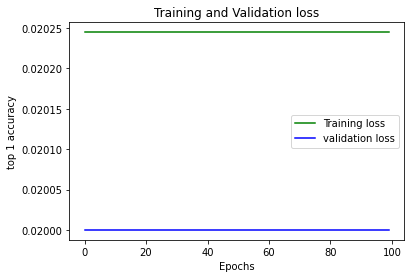

In [11]:
plt.plot(X, train_accu1, 'g', label='Training loss')
plt.plot(X, val_accu1, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('top 1 accuracy')
plt.legend()
plt.savefig('top1 accuracy.png')
plt.show()

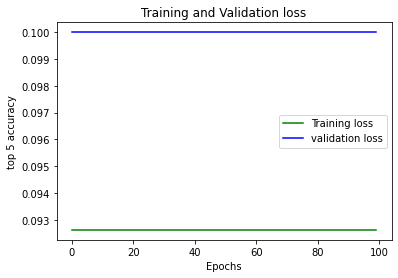

In [12]:
plt.plot(X, train_accu5, 'g', label='Training loss')
plt.plot(X, val_accu5, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('top 5 accuracy')
plt.legend()
plt.savefig('top5 accuracy.png')
plt.show()

# try

In [4]:
x = np.ones([4, 5])
np.matmul(np.ones(4), x)

array([4., 4., 4., 4., 4.])

In [13]:
x = np.ones([5, 5])
y = np.array([1, 2, 3, 4, 5]).T
x.T * y, y * x

(array([[1., 2., 3., 4., 5.],
        [1., 2., 3., 4., 5.],
        [1., 2., 3., 4., 5.],
        [1., 2., 3., 4., 5.],
        [1., 2., 3., 4., 5.]]),
 array([[1., 2., 3., 4., 5.],
        [1., 2., 3., 4., 5.],
        [1., 2., 3., 4., 5.],
        [1., 2., 3., 4., 5.],
        [1., 2., 3., 4., 5.]]))

In [12]:
y

array([1, 2, 3, 4, 5])

In [24]:
class Perceptron:
    def __init__(self, n_inputs, activ_func='Sign', save_fig=False):
        self.weights = np.array([0.0] * (n_inputs + 1)) # 1 more for bias
        self.__save_fig = save_fig
        #self.__activation = ActivationFunction(activ_func)
        
    @property
    def weight(self):
        return self.weights[:]

In [25]:
p = Perceptron(5)

In [26]:
p.weight

array([0., 0., 0., 0., 0., 0.])

In [4]:
x = np.random.rand(5, 5)
x

array([[0.4312073 , 0.79563335, 0.7903964 , 0.44791607, 0.97743261],
       [0.19974816, 0.47477725, 0.23096726, 0.31079405, 0.12462861],
       [0.65393639, 0.70778974, 0.82724055, 0.1705234 , 0.76576441],
       [0.1714608 , 0.6969142 , 0.53680819, 0.25848411, 0.22410697],
       [0.94678149, 0.24725074, 0.92050283, 0.18422513, 0.4689876 ]])

In [10]:
x + np.ones([1, 5])

array([[1.4312073 , 1.79563335, 1.7903964 , 1.44791607, 1.97743261],
       [1.19974816, 1.47477725, 1.23096726, 1.31079405, 1.12462861],
       [1.65393639, 1.70778974, 1.82724055, 1.1705234 , 1.76576441],
       [1.1714608 , 1.6969142 , 1.53680819, 1.25848411, 1.22410697],
       [1.94678149, 1.24725074, 1.92050283, 1.18422513, 1.4689876 ]])

In [9]:
np.ones([1, 5])

array([[1., 1., 1., 1., 1.]])

In [42]:
np.argsort(np.random.rand(4, 5), axis=1)

array([[3, 4, 1, 2, 0],
       [1, 2, 4, 0, 3],
       [3, 0, 2, 4, 1],
       [4, 2, 1, 0, 3]], dtype=int64)

In [43]:
5 in np.array([3, 5])

True

In [17]:
x = np.random.rand(4, 5)
x

array([[0.6145373 , 0.97898866, 0.70528055, 0.25576186, 0.44729359],
       [0.35282704, 0.86313082, 0.05634414, 0.12630937, 0.61096443],
       [0.09034133, 0.58801322, 0.10469448, 0.07339031, 0.42117945],
       [0.35821314, 0.32672913, 0.57349844, 0.43201292, 0.31985492]])

In [26]:
y = np.array([2, 3, 4, 5]).reshape([1, -1])
x / y.T

array([[0.30726865, 0.48949433, 0.35264028, 0.12788093, 0.22364679],
       [0.11760901, 0.28771027, 0.01878138, 0.04210312, 0.20365481],
       [0.02258533, 0.1470033 , 0.02617362, 0.01834758, 0.10529486],
       [0.07164263, 0.06534583, 0.11469969, 0.08640258, 0.06397098]])

In [13]:
np.sum(x, axis=1)

array([1.95657326, 2.57029645, 1.92410748, 3.18509092])

In [27]:
y

array([[2, 3, 4, 5]])